In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### 1. Import data into Python environment.

In [2]:
import os

In [3]:
# To check the current working directory:
os.getcwd()

'C:\\Users\\Admin\\Desktop\\PGDS2022 SHALINI\\SUJATA PYTHON\\SESSION9,20AUGUST22'

In [4]:
# Import the dataset into the Notebook:
com_cast = pd.read_csv('Comcast_telecom_complaints_data.csv')

In [5]:
# Check whether data imported or not:
com_cast.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No


In [6]:
# Check number of records and features: 
com_cast.shape

(2224, 11)

In [7]:
# No duplicate columns name found.
com_cast.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [8]:
# Check for zero columns or single value.
com_cast.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [9]:
# Check missing value or null values.
com_cast.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

#### 2. Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [10]:
com_cast.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [11]:
# To extract Date, month and year, first to convert into datetime format and overwrite to the same name respectively
com_cast['Date'] = pd.to_datetime(com_cast['Date'])
com_cast['Date_month_year'] = pd.to_datetime(com_cast['Date_month_year'])
com_cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Date_month_year              2224 non-null   datetime64[ns]
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](2), int64(1), object(8)
m

In [12]:
com_cast['date'] = com_cast['Date_month_year'].dt.day
com_cast['month'] = com_cast['Date_month_year'].dt.month
com_cast['year'] = com_cast['Date_month_year'].dt.year

In [13]:
com_cast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date,month,year
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,4,2015
1,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,8,2015
2,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18,4,2015
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,7,2015
4,307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26,5,2015


In [14]:
com_cast['month_name'] = pd.to_datetime(com_cast['Date_month_year']).dt.month_name()
com_cast.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date,month,year,month_name
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,4,2015,April
1,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,8,2015,August


In [15]:
c = com_cast.groupby(['date', 'month_name'])['Customer Complaint'].count().to_frame().reset_index()
c

,date,month_name,Customer Complaint
0,4,April,12
1,4,August,28
2,4,December,15
3,4,February,27
4,4,January,18
...,...,...,...
86,29,May,14
87,30,April,24
88,30,June,53
89,30,May,9


[Text(0.5, 1.0, 'Monthly Number of Complaint')]

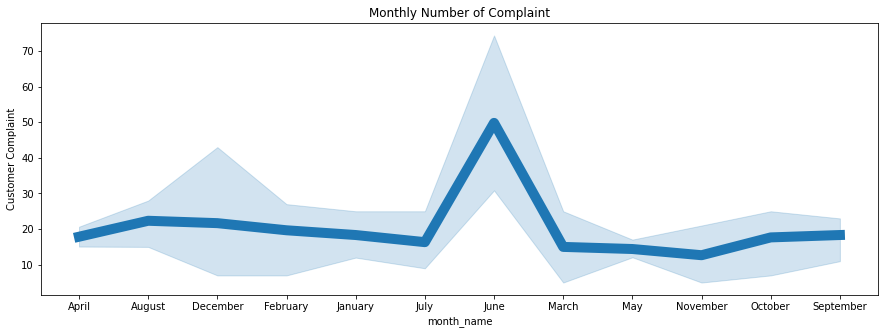

In [16]:
plt.figure(figsize = (15, 5)) # width, height

sns.lineplot(x = 'month_name', y = 'Customer Complaint', data = c, palette = 'bright', lw = 10).set(title = 'Monthly Number of Complaint')

[Text(0.5, 1.0, 'Daily Granularity Levels Complaints')]

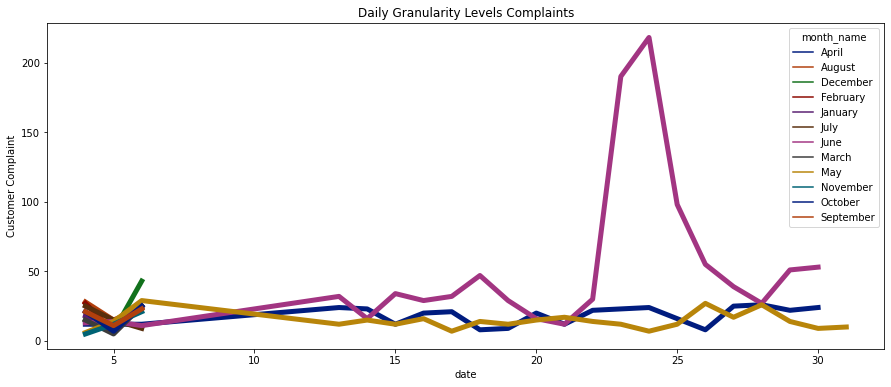

In [17]:
plt.figure(figsize = (15, 6)) # width, height

sns.lineplot(x = 'date', y = 'Customer Complaint', data = c, palette = 'dark', lw = 5, hue = 'month_name').set(title = 'Daily Granularity Levels Complaints')

#### 3. Provide a table with the frequency of complaint types.

In [18]:
print(com_cast['Received Via'].unique())

['Customer Care Call' 'Internet']


In [19]:
com_cast['Received Via'].value_counts()

Customer Care Call    1119
Internet              1105
Name: Received Via, dtype: int64

In [ ]:
### 3(a) Complaint of Customer Care Call are maximum that to around 1119.

#### 4. Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [20]:
com_cast['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [21]:
com_cast['New_Status'] = com_cast['Status'].apply(lambda Status: 'Open' if Status == 'Open' or Status == 'Pending' else 'Closed') 
com_cast.head(23)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date,month,year,month_name,New_Status
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,4,2015,April,Closed
1,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,8,2015,August,Closed
2,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18,4,2015,April,Closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,5,7,2015,July,Open
4,307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26,5,2015,May,Closed
5,338519,ISP Charging for arbitrary data limits with ov...,2015-06-12,2015-12-06,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,6,12,2015,December,Closed
6,361148,Throttling service and unreasonable data caps,2015-06-24,2015-06-24,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,24,6,2015,June,Open
7,359792,Comcast refuses to help troubleshoot and corre...,2015-06-23,2015-06-23,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No,23,6,2015,June,Closed
8,318072,Comcast extended outages,2015-06-01,2015-01-06,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No,6,1,2015,January,Closed
9,371214,Comcast Raising Prices and Not Being Available...,2015-06-28,2015-06-28,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,28,6,2015,June,Open


In [22]:
print(com_cast['Status'].unique())
print(com_cast['New_Status'].unique())

['Closed' 'Open' 'Solved' 'Pending']
['Closed' 'Open']


#### 5. Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

In [23]:
com_cast.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date,month,year,month_name,New_Status
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22,4,2015,April,Closed
1,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,4,8,2015,August,Closed


In [24]:
open_n = com_cast[com_cast['New_Status'] == 'Open'].groupby(['State'])['New_Status'].count().to_frame().reset_index()
closed_n = com_cast[com_cast['New_Status'] == 'Closed'].groupby(['State'])['New_Status'].count().to_frame().reset_index()
print(open_n)
print(closed_n)

                   State  New_Status
0                Alabama           9
1                Arizona           6
2             California          61
3               Colorado          22
4            Connecticut           3
5               Delaware           4
6   District Of Columbia           2
7                Florida          39
8                Georgia          80
9               Illinois          29
10               Indiana           9
11                Kansas           1
12              Kentucky           3
13             Louisiana           1
14                 Maine           2
15              Maryland          15
16         Massachusetts          11
17              Michigan          23
18             Minnesota           4
19           Mississippi          16
20              Missouri           1
21         New Hampshire           4
22            New Jersey          19
23            New Mexico           4
24                Oregon          13
25          Pennsylvania          20
2

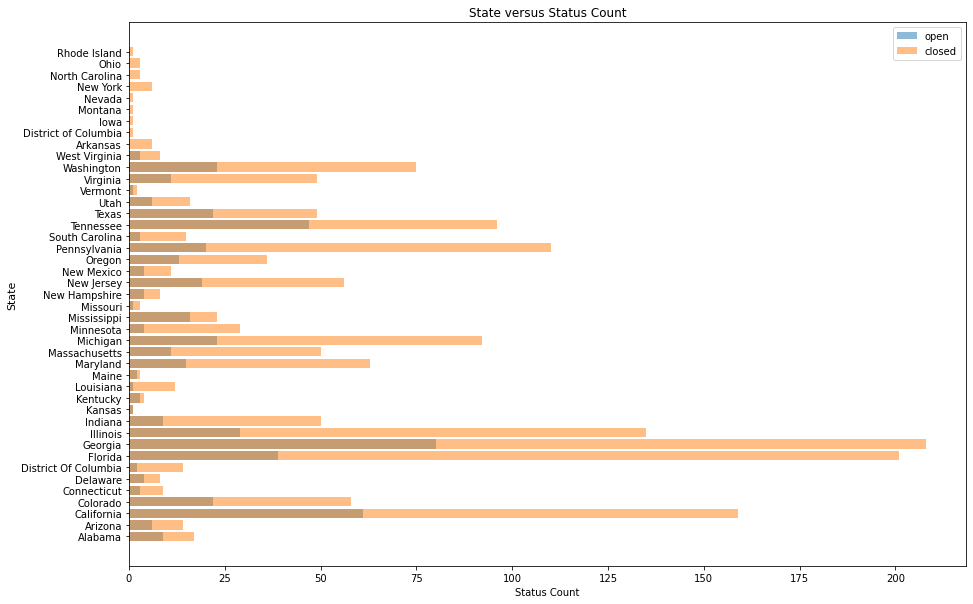

In [25]:
fig = plt.figure(figsize = (15, 10))

plt.barh(open_n.State, open_n.New_Status, alpha = 0.5)
plt.barh(closed_n.State, closed_n.New_Status, alpha = 0.5)

plt.ylabel('State', size = 11)
plt.xlabel('Status Count')
plt.legend(['open', 'closed'])
plt.title('State versus Status Count')
plt.show()

#### Tried another way to solve Q5

In [26]:
pd.crosstab(com_cast.State, com_cast.New_Status)

New_Status,Closed,Open
State,,
Alabama,17,9
Arizona,14,6
Arkansas,6,0
California,159,61
Colorado,58,22
Connecticut,9,3
Delaware,8,4
District Of Columbia,14,2
District of Columbia,1,0


<AxesSubplot:title={'center':'State wise versus Status Count'}, xlabel='State'>

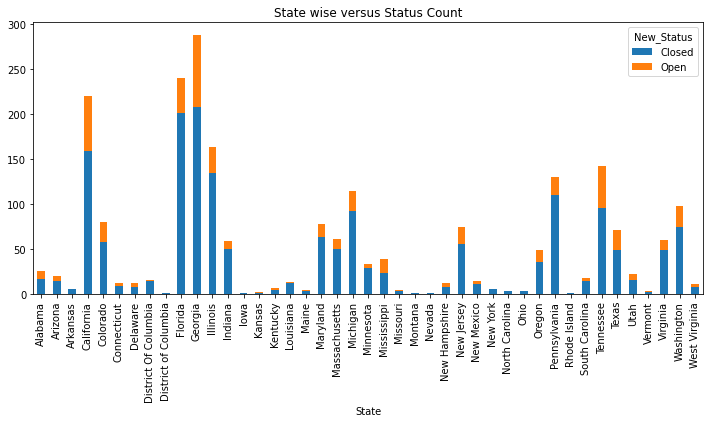

In [27]:
pd.crosstab(com_cast.State, com_cast.New_Status).plot(kind = 'bar', figsize = (12, 5),  stacked = True, title = 'State wise versus Status Count')

In [ ]:
#### 5(a) Which state has the maximum complaints. 
# --> Georgia has maximum number of complaints.

In [ ]:
#### 5(b) Which state has the highest percentage of unresolved complaints.
# --> Georgia has the highest percentage of unresolved complaints.

#### 6. Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [28]:
y = com_cast['Received Via'].value_counts()
y

Customer Care Call    1119
Internet              1105
Name: Received Via, dtype: int64

<AxesSubplot:title={'center':'Complaints Status through the Internet & Customer Care Calls\n'}, ylabel='Received Via'>

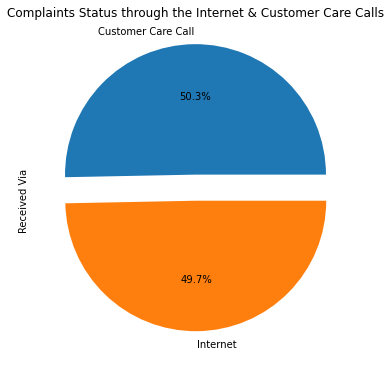

In [29]:
# Used autopct='%1.1f%%' to show percentage under the pie chart

myexplode = [0.2, 0]
plt.title('Complaints Status through the Internet & Customer Care Calls\n')
y.plot(kind ='pie',explode = myexplode,autopct = '%1.1f%%',
                            figsize = (14,6))

In [30]:
d = com_cast.groupby(['New_Status', 'Received Via'])['Received Via'].count().to_frame().rename(columns = {'Received Via' : 'Count'}).reset_index()
d

,New_Status,Received Via,Count
0,Closed,Customer Care Call,864
1,Closed,Internet,843
2,Open,Customer Care Call,255
3,Open,Internet,262


In [31]:
z = com_cast.New_Status.value_counts()
z

Closed    1707
Open       517
Name: New_Status, dtype: int64

<AxesSubplot:title={'center':'Complaints Status through the Internet & Customer Care Calls\n'}, ylabel='New_Status'>

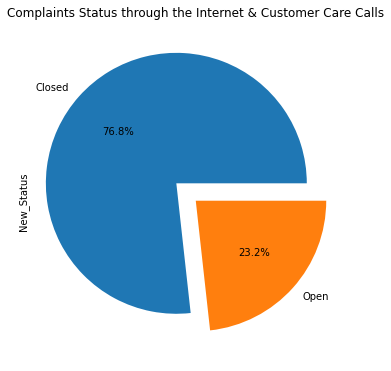

In [32]:
# Used autopct='%1.1f%%' to show percentage under the pie chart

myexplode = [0.2, 0]
plt.title('Complaints Status through the Internet & Customer Care Calls\n')
z.plot(kind ='pie',explode = myexplode,autopct = '%1.1f%%',
                            figsize = (14,6))

   ## THANK YOU